# K-Nearest Neighbors:-

In [1]:
import pickle
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
#from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn import cross_validation
import matplotlib.pyplot as plt

/Users/yogeshmehra/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Loading all the pickles files generated during preprocessing!!!
#1.loading avgW2Vec files:-
with open('test_avgw2v.pkl', 'rb') as f:
       test_avgw2v = pickle.load(f)
with open('train_avgw2v.pkl', 'rb') as f:
        train_avgw2v = pickle.load(f)
#with open('cv_avgw2v.pkl', 'rb') as f:
 #       cv_avgw2v = pickle.load(f)
#2. loading tfidf files:-
with open('testtfidf.pkl', 'rb') as f:
        testtfidf = pickle.load(f)
with open('traintfidf.pkl', 'rb') as f:
        traintfidf = pickle.load(f)
#with open('cvtfidf.pkl', 'rb') as f:
 #       cvtfidf = pickle.load(f)
#3. loading Bow files:-
with open('testbow.pkl', 'rb') as f:
        testbow = pickle.load(f)
with open('trainbow.pkl', 'rb') as f:
        trainbow = pickle.load(f)
#with open('cvbow.pkl', 'rb') as f:
 #       cvbow = pickle.load(f)

In [3]:
#loading test train and cv dataset:-
with open('traindf.pkl', 'rb') as f:
        train_df = pickle.load(f)
with open('testdf.pkl', 'rb') as f:
        test_df = pickle.load(f)
#with open('cvdf.pkl', 'rb') as f:
 #       cv_df = pickle.load(f)

In [4]:
testbow.shape

(12000, 20947)

# Distribution of Class label:-
1.Train data:-


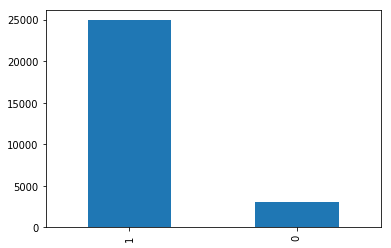

In [5]:
train_df['Score'].value_counts().plot(kind='bar')
plt.show()

2.Test data:-


# Knn Classifier (Brute Force)

In [6]:
def brute_knn_classifier(X,Y):
    neighbors = [i for i in range(1,50,3)]
    cv_scores = []
    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k, algorithm = "brute")
        scores = cross_val_score(knn,X,Y,cv = 10,scoring = 'accuracy')
        cv_scores.append(scores.mean())
    MSE = [1 - x for x in cv_scores]
    optimal_k = neighbors[MSE.index(min(MSE))]
    print("Optimal number of neighbor is"+" "+str(optimal_k))
    plt.plot(neighbors,MSE)
    for xy in zip(neighbors, np.round(MSE,3)):
        plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    plt.title("Misclassification error vs K")
    plt.xlabel('Number of neighbors K')
    plt.ylabel('Misclassification Error')
    plt.show()

    print("the misclassification error for each k value is : ", np.round(MSE,3))
    return optimal_k


        

# Bag_of_Words:-

Optimal number of neighbor is 10


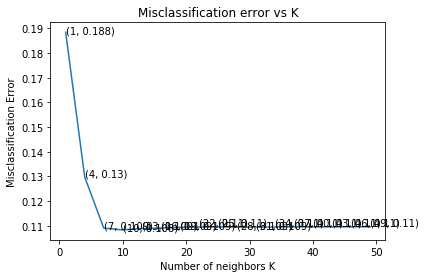

the misclassification error for each k value is :  [0.188 0.13  0.109 0.108 0.109 0.109 0.109 0.11  0.11  0.109 0.109 0.11
 0.11  0.11  0.11  0.11  0.11 ]


In [7]:
optimal_k = brute_knn_classifier(trainbow,train_df["Score"])

In [8]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(trainbow, train_df["Score"])
#knn_optimal.fit(bow_data, y_train)

# predict the response
pred = knn_optimal.predict(testbow)



In [9]:
pred_train = knn_optimal.predict(trainbow)

In [16]:
#evaluate accuracy on test data
acc_bow = accuracy_score(train_df["Score"], pred_train) * 100
print('\nThe train accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc_bow))


The train accuracy of the knn classifier for k = 10 is 89.642857%


In [10]:
#evaluate accuracy on test data
acc_bow = accuracy_score(test_df["Score"], pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc_bow))


The accuracy of the knn classifier for k = 10 is 89.016667%


In [11]:
type(trainbow)

scipy.sparse.csr.csr_matrix

In [12]:
knn = KNeighborsClassifier(n_neighbors=1, algorithm = "brute")
scores = cross_val_score(knn,trainbow,train_df["Score"],cv = 10,scoring = 'accuracy')

In [13]:
print(scores)

[0.84321429 0.81642857 0.8        0.79571429 0.78785714 0.81464286
 0.81107143 0.81392857 0.82142857 0.81107143]


In [14]:
print("hi")

hi
